#<center> **Previsão de Vendas**
##<center> **Medindo a Temperatura, para fazer a previsão de lucro**

# **Bibliotecas**

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.linear_model import LinearRegression

# **Conectando ao Google Drive**

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


# **Base de dados**

In [4]:
path = './drive/MyDrive/DataScientist/deep-learning/SalesData.csv'

In [5]:
df = pd.read_csv(path)
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


# **Visualização**

In [7]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [10]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


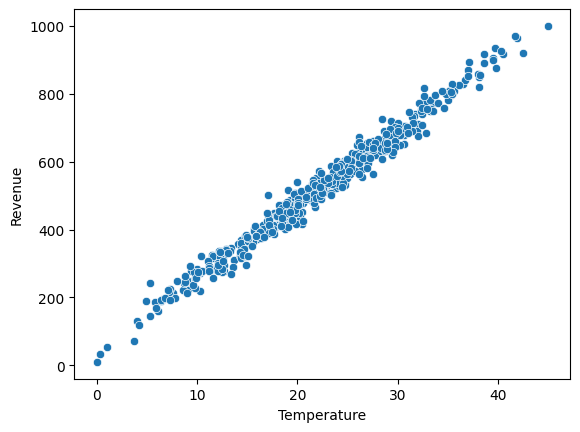

In [12]:
sns.scatterplot(x=df['Temperature'],y=df['Revenue']);

# **Base de Treinamento**

In [13]:
x_train = df['Temperature']
y_train = df['Revenue']

# **Treinamento**

In [28]:
#Rede neural
model = tf.keras.Sequential()
#Adicionando Camadas
model.add(tf.keras.layers.Dense(units = 1000,input_shape = [1]))
model.add(tf.keras.layers.Dense(units = 1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1000)              2000      
                                                                 
 dense_10 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mean_squared_error')

In [31]:
epochs_hist = model.fit(x_train,y_train,epochs=2000)

Epoch 1/2000
16/16 [==============================] - 0s 7ms/step - loss: 647.7308
Epoch 2/2000
16/16 [==============================] - 0s 7ms/step - loss: 701.3151
Epoch 3/2000
16/16 [==============================] - 0s 8ms/step - loss: 646.8740
Epoch 4/2000
16/16 [==============================] - 0s 8ms/step - loss: 627.7180
Epoch 5/2000
16/16 [==============================] - 0s 5ms/step - loss: 639.7897
Epoch 6/2000
16/16 [==============================] - 0s 5ms/step - loss: 663.5494
Epoch 7/2000
16/16 [==============================] - 0s 5ms/step - loss: 684.5738
Epoch 8/2000
16/16 [==============================] - 0s 13ms/step - loss: 645.3042
Epoch 9/2000
16/16 [==============================] - 0s 9ms/step - loss: 643.0459
Epoch 10/2000
16/16 [==============================] - 0s 9ms/step - loss: 664.2142
Epoch 11/2000
16/16 [==============================] - 0s 9ms/step - loss: 746.8232
Epoch 12/2000
16/16 [==============================] - 0s 8ms/step - loss: 787.5575


In [32]:
epochs_hist.history.keys()

dict_keys(['loss'])

Text(0, 0.5, 'Training loss')

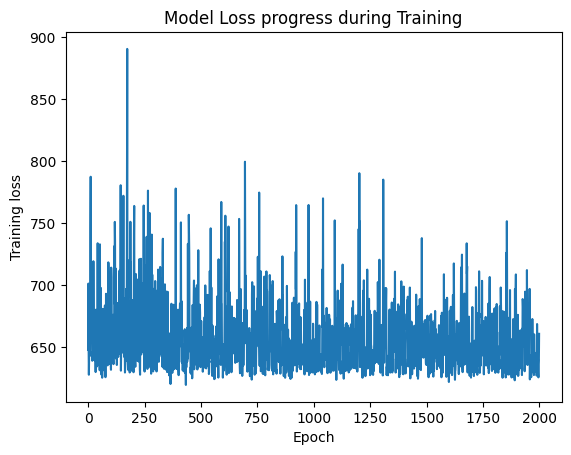

In [33]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss progress during Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')

In [35]:
model.get_weights()

[array([[ 2.00416442e-04,  2.11403100e-03, -2.45660730e-03,
         -7.56031135e-04, -1.20736076e-03,  1.11403537e-03,
          1.82118776e-04,  9.47157387e-04,  1.32685617e-01,
          9.21149476e-05, -6.92053582e-04, -3.69208166e-04,
         -2.58646731e-04, -6.35217584e-04, -1.87409227e-04,
          2.61679525e-03, -1.51550601e-04, -6.82511483e-04,
         -8.66477378e-04,  7.83894939e-05, -5.87876944e-04,
          5.25068026e-04,  3.24252411e-03,  1.10994931e-03,
          2.79039377e-04, -4.75543609e-04,  2.24435492e-03,
         -3.32184951e-04, -1.51781109e-03, -3.27766116e-04,
          7.53439497e-04, -1.65101679e-04, -1.48487661e-03,
          1.85969309e-03,  3.86129192e-04,  1.18695694e-04,
          7.24781858e-05, -4.21815312e-05, -9.79284989e-04,
         -2.68189469e-04, -8.92041135e-04, -8.70297721e-04,
          3.21004074e-04,  5.36191583e-05, -6.91248238e-01,
          2.36520101e-03,  2.39143427e-03, -9.02940519e-05,
         -1.20686338e-04, -2.43159686e-0

## **Testes**

In [51]:
#Pela IA
temp = 5
lucro = model.predict([temp])
lucro

1/1 [==============================] - 0s 39ms/step


array([[152.43509]], dtype=float32)

16/16 [==============================] - 0s 1ms/step


Text(0.5, 0, 'Temperatura [Celsius]')

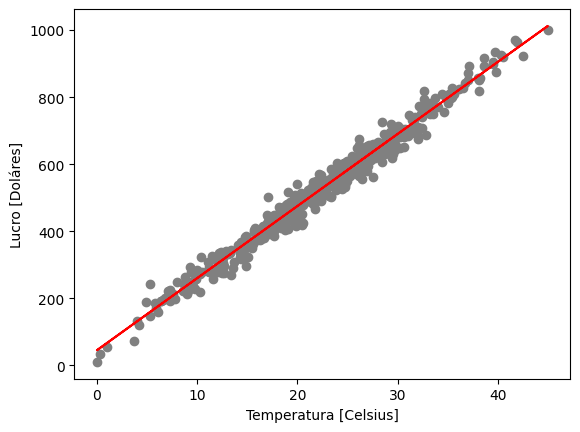

In [38]:
plt.scatter(x_train,y_train, color ='gray')
plt.plot(x_train, model.predict(x_train),color='red')
plt.ylabel('Lucro [Doláres]')
plt.xlabel('Temperatura [Celsius]')

# **Usando sklearn**

In [43]:
x_train = x_train.reshape(-1,1)


In [45]:
y_train = y_train.values.reshape(-1,1)

In [47]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [48]:
regressor.coef_

array([[21.44362551]])

In [49]:
regressor.intercept_

array([44.83126709])

Text(0.5, 0, 'Temperatura [Celsius]')

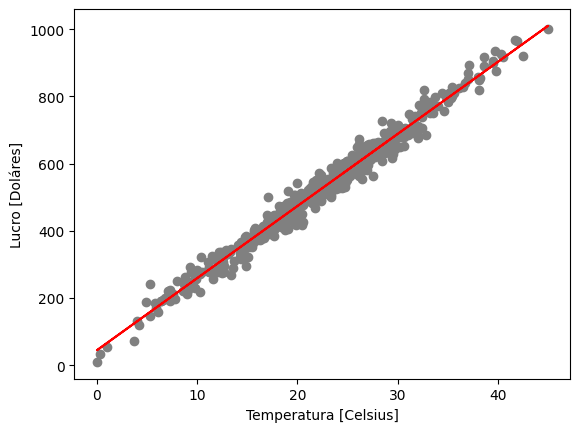

In [50]:
plt.scatter(x_train,y_train, color ='gray')
plt.plot(x_train, regressor.predict(x_train),color='red')
plt.ylabel('Lucro [Doláres]')
plt.xlabel('Temperatura [Celsius]')

In [52]:
#Pela IA
temp = 5
lucro = regressor.predict([[temp]])
lucro

array([[152.04939464]])